##DMV -1 Sales in multiple format

1. import libraries
2. load datasets
3. check dataset shape, col, head
4. check null values
5. check % null vales
6. drop duplicates
7. drop unwanted columns
8. fill wanted column (territory using mapping)
9. dropna
10. check shape of data
11. Calculate Unique of categorical variables like country
12. Plot individual :

    a. Box Plot - csv - sales vs country

    b. Remove outlier plot box plot - filtered_df - sales vs country

    c. box plot - status vs quantityordered - filtered_df

    d. bar plot - status vs quantityordered - filtered df

    e. histplot - sales - csv_df

    f. Count plot - segment - excel_df

    g. correlation heatmap - excel_df['Sales','Quantity','Discount','Predict']

    h. box plot - quantity vs region json_df

    i. histplot - revenue - json

13. standardize all columns of all df to lowercase for merging
14. concatenate all cols
15. create new cols : discounted_sales , total quantity sales
16. computational analytics on data - total-sales, avg-sales, productline-sales, data.describe()
17. Visualization using all_data
18. summary of all_data


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [ ]:
df1=pd.read_csv('/content/sales_data_sample.csv',encoding='latin-1')

In [ ]:
df2=pd.read_excel('/content/Sample - Superstore.xls')
jsonfile='sales.json'
with open(jsonfile,'r') as f:
  json_data=json.load(f)
df3=pd.json_normalize(json_data['sales'])

In [ ]:
print(f"{df1.isnull().sum()}\n\n{df2.isnull().sum()}\n\n{df3.isnull().sum()}")

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0


In [ ]:
df1.drop(['ADDRESSLINE2','STATE','POSTALCODE'],axis=1,inplace=True)

In [ ]:
df1['COUNTRY'].unique()

array(['USA', 'France', 'Norway', 'Australia', 'Finland', 'Austria', 'UK',
       'Spain', 'Sweden', 'Singapore', 'Canada', 'Japan', 'Italy',
       'Denmark', 'Belgium', 'Philippines', 'Germany', 'Switzerland',
       'Ireland'], dtype=object)

In [ ]:
mapping={
    'USA':'NA', 'France':'NA', 'Norway':'EMEA', 'Australia':'EMEA', 'Finland':'APAC', 'Austria':'EMEA', 'UK':'APAC',
       'Spain':'EMEA', 'Sweden':'NA', 'Singapore':'APAC', 'Canada':'EMEA', 'Japan':'APAC', 'Italy':'EMEA',
       'Denmark':'EMEA', 'Belgium':'NA', 'Philippines':'APAC', 'Germany':'EMEA', 'Switzerland':'APAC',
       'Ireland':'APAC'
}
df1['TERRITORY']=df1['TERRITORY'].fillna(df1['COUNTRY'].map(mapping))

In [ ]:
df1.isnull().sum()

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


In [ ]:
df1.drop_duplicates(inplace=True)
df1.dropna(inplace=True)
df2.drop_duplicates(inplace=True)
df2.dropna(inplace=True)
df3.drop_duplicates(inplace=True)
df3.dropna(inplace=True)

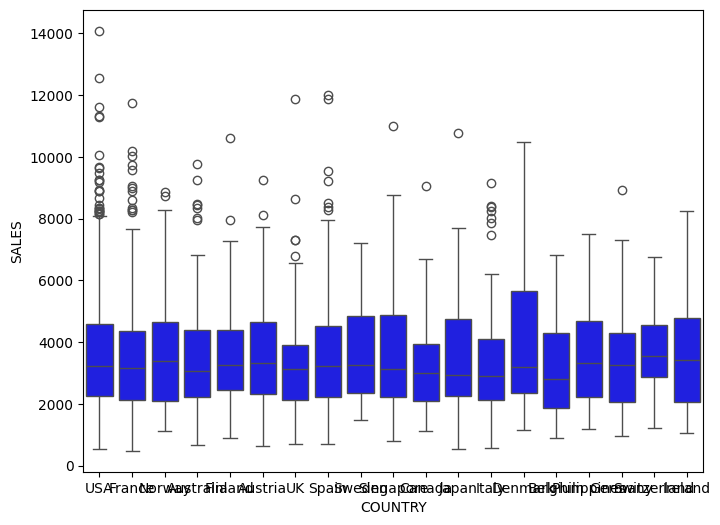

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='COUNTRY',y='SALES',data=df1,color='Blue')
plt.show()

In [ ]:
# Calculate IQR
Q1 = df1['SALES'].quantile(0.25)
Q3 = df1['SALES'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df1=df1[~((df1['SALES']<lower_bound)|(df1['SALES']>upper_bound))]

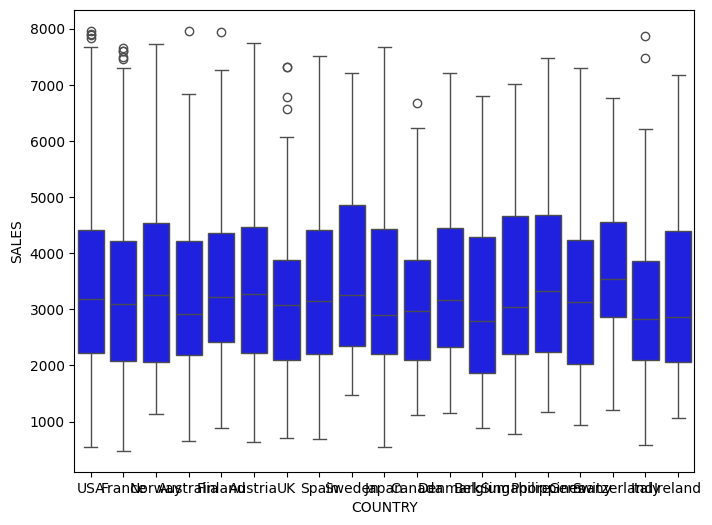

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='COUNTRY',y='SALES',data=df1,color='Blue')
plt.show()

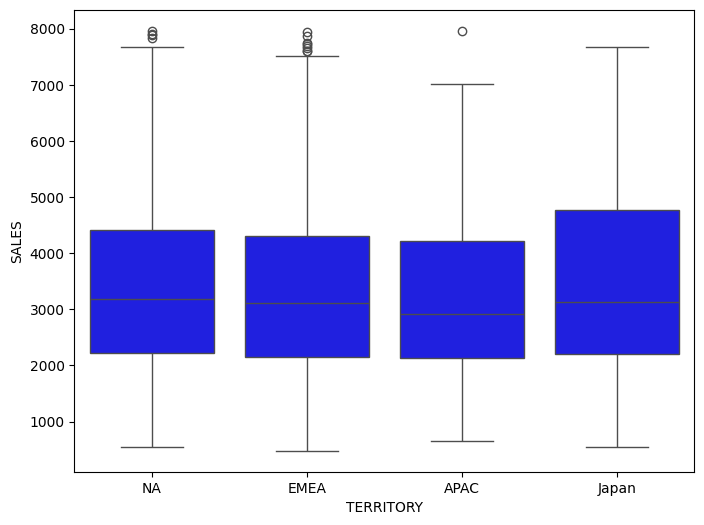

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='TERRITORY',y='SALES',data=df1,color='Blue')
plt.show()

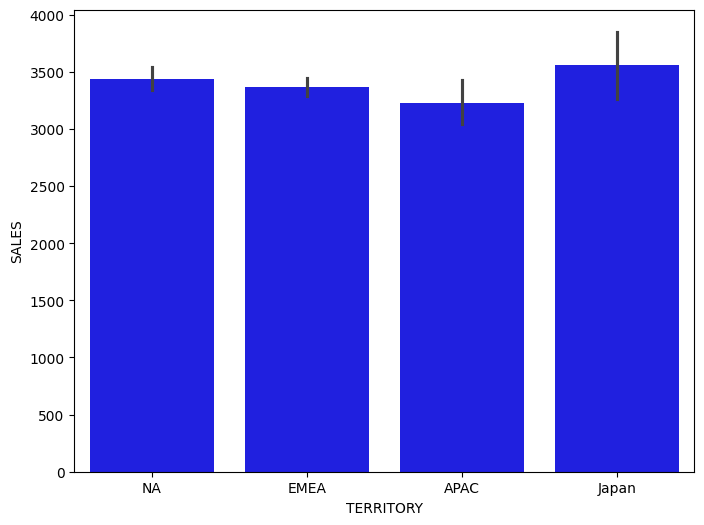

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='TERRITORY',y='SALES',data=df1,color='Blue')
plt.show()

In [ ]:
# Convert Data to Unified Format
# Assuming all datasets have a "common column" for joining, e.g., 'ProductCode'
# For demonstration, we concatenate all data
print(f"Lets standardize column name before combining ")
df1.columns = df1.columns.str.lower()
df2.columns = df2.columns.str.lower()
df3.columns = df3.columns.str.lower()
print(f"\n CSV\n{df1.columns}\nEXCEL\n{df2.columns}\nJSON\n{df3.columns}")
all_data = pd.concat([df1, df2, df3], ignore_index=True, sort=False)


Lets standardize column name before combining 

 CSV
Index(['ordernumber', 'quantityordered', 'priceeach', 'orderlinenumber',
       'sales', 'orderdate', 'status', 'qtr_id', 'month_id', 'year_id',
       'productline', 'msrp', 'productcode', 'customername', 'phone',
       'addressline1', 'city', 'country', 'territory', 'contactlastname',
       'contactfirstname', 'dealsize'],
      dtype='object')
EXCEL
Index(['row id', 'order id', 'order date', 'ship date', 'ship mode',
       'customer id', 'customer name', 'segment', 'country', 'city', 'state',
       'postal code', 'region', 'product id', 'category', 'sub-category',
       'product name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')
JSON
Index(['region', 'salesperson', 'product', 'quantity', 'revenue'], dtype='object')


In [ ]:
# Data Transformation
# Example: Creating new columns based on existing data
all_data['discounted_sales'] = all_data['sales'] * (1 - all_data.get('discount', 0))
all_data['total_quantity_sales'] = all_data.groupby('productline')['quantityordered'].transform('sum')

In [ ]:
# Data Analysis
# Calculate summary statistics
total_sales = all_data['sales'].sum()
average_sales = all_data['sales'].mean()
productline_sales = all_data.groupby('productline')['sales'].sum()
print("\nTotal Sales:", total_sales)
print("Average Sales:", average_sales)
print("\nSales by Product Line:\n", productline_sales)
print("\nDescribe :", all_data.describe())


Total Sales: 11586881.430300001
Average Sales: 909.7739816504397

Sales by Product Line:
 productline
Classic Cars        3483171.75
Motorcycles         1058843.27
Planes               946737.07
Ships                714437.13
Trains               217266.42
Trucks and Buses    1085798.78
Vintage Cars        1783426.15
Name: sales, dtype: float64

Describe :         ordernumber  quantityordered    priceeach  orderlinenumber  \
count   2742.000000      2742.000000  2742.000000      2742.000000   
mean   10258.067104        34.687454    83.178260         6.497812   
min    10100.000000         6.000000    26.880000         1.000000   
25%    10180.000000        27.000000    68.080000         3.000000   
50%    10262.000000        34.000000    94.140000         6.000000   
75%    10332.000000        42.000000   100.000000         9.000000   
max    10425.000000        85.000000   100.000000        18.000000   
std       91.662137         9.426014    20.272402         4.231770   

         

In [ ]:
# Summary
print("\nSummary of Key Metrics:")
print("Total Sales: ", total_sales)
print("Max Sale: ", all_data['sales'].max())
print("Min Sale: ", all_data['sales'].min())
print("Average Sale per Product Line:\n", productline_sales)



Summary of Key Metrics:
Total Sales:  11586881.430300001
Max Sale:  22638.48
Min Sale:  0.44399999999999995
Average Sale per Product Line:
 productline
Classic Cars        3483171.75
Motorcycles         1058843.27
Planes               946737.07
Ships                714437.13
Trains               217266.42
Trucks and Buses    1085798.78
Vintage Cars        1783426.15
Name: sales, dtype: float64


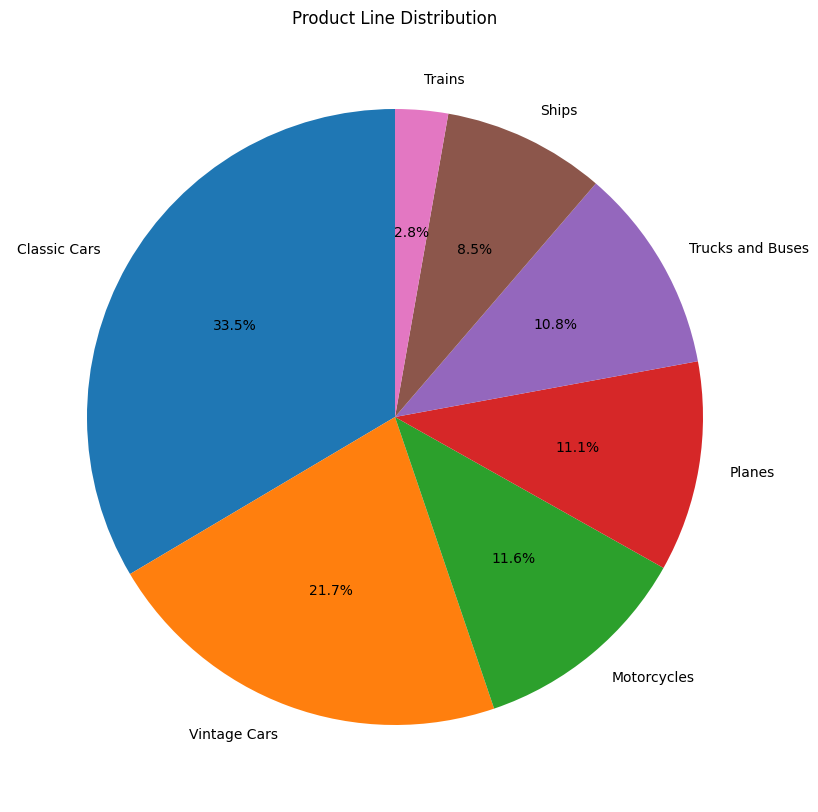

In [ ]:
# Data Visualization
# 1. Pie chart for Product Line distribution
data_pie = all_data['productline'].value_counts().rename_axis('productline').reset_index(name='orders')
plt.figure(figsize=(10, 10))
plt.pie(data_pie.orders, labels=data_pie.productline, startangle=90, autopct='%.1f%%')
plt.title('Product Line Distribution')
plt.show()

##DMV -2 : OpenweatherAPI

In [ ]:
import requests
import json
import datetime
#pandas , sns, plt

In [ ]:
lat = 18.184135
lon = 74.610764

In [ ]:
api_key = "bd4debe75858698ff9a9c54d7f4d4eab"
api_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={api_key}"

In [ ]:
response=requests.get(api_url)

In [ ]:
weather_data=response.json()

In [ ]:
temp=[item['main']['temp'] for item in weather_data['list']]
humidity=[item['main']['humidity'] for item in weather_data['list']]
windspeed=[item['wind']['speed'] for item in weather_data['list']]
descr=[item['weather'][0]['description'] for item in weather_data['list']]
timest=[pd.to_datetime(item['dt'] , unit='s') for item in weather_data['list']]

In [ ]:
weather_df = pd.DataFrame({
    'Timestamp': timest,
    'Temperature': temp,
    'Humidity': humidity,
    'Wind Speed': windspeed,
    'Weather Description': descr
})

In [ ]:
weather_df.set_index('Timestamp', inplace=True)
weather_df['Temperature']=weather_df['Temperature'].apply(lambda x : x-273.15)

In [ ]:
weather_df.fillna(0)
weather_df.head()

,Temperature,Humidity,Wind Speed,Weather Description
Timestamp,,,,
2024-11-10 18:00:00,23.12,40,3.30,clear sky
2024-11-10 21:00:00,22.33,43,2.88,clear sky
2024-11-11 00:00:00,20.74,50,2.11,clear sky
2024-11-11 03:00:00,23.56,45,2.12,clear sky
2024-11-11 06:00:00,28.43,31,4.08,clear sky


In [ ]:
maxtemp=weather_df['Temperature'].max()
mintemp=weather_df['Temperature'].min()

In [ ]:
maxtemp

31.670000000000016

In [ ]:
mintemp

18.900000000000034

In [ ]:
daily_mean_temp=weather_df['Temperature'].resample('D').mean()

In [ ]:
daily_mean_hum=weather_df['Humidity'].resample('D').mean()

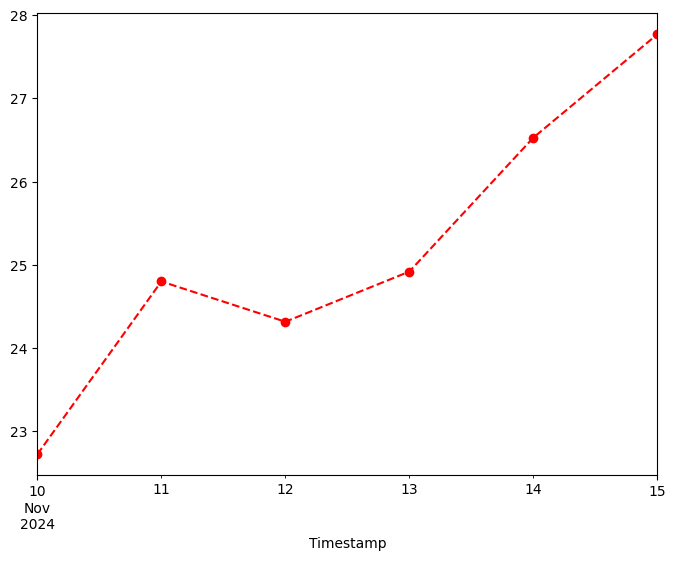

In [ ]:
plt.figure(figsize=(8,6))
daily_mean_temp.plot(color='red',marker='o',linestyle='--')
plt.show()

<Axes: xlabel='Timestamp'>

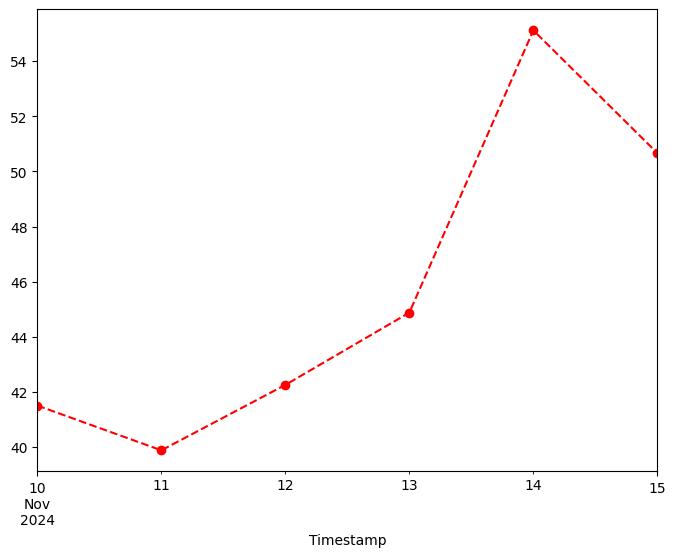

In [ ]:
plt.figure(figsize=(8,6))
daily_mean_hum.plot(color='red',marker='o',linestyle='--')

<Axes: xlabel='Timestamp'>

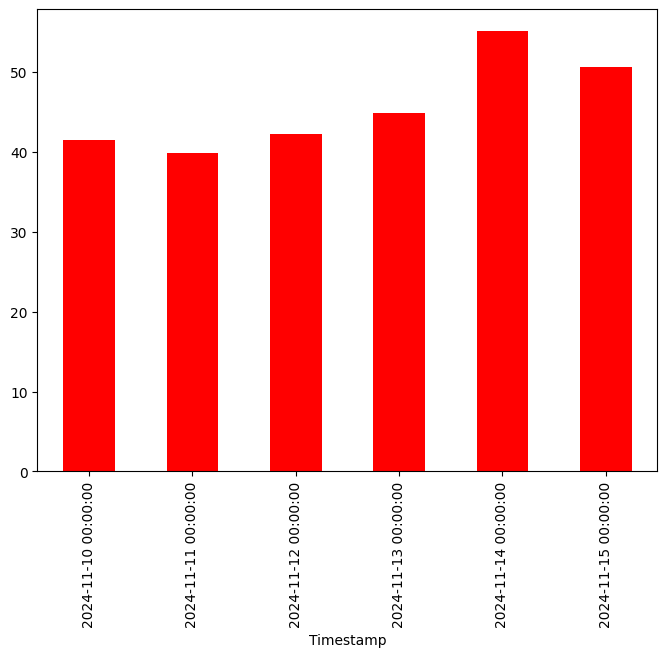

In [ ]:
plt.figure(figsize=(8,6))
daily_mean_hum.plot(color='red',kind='bar')

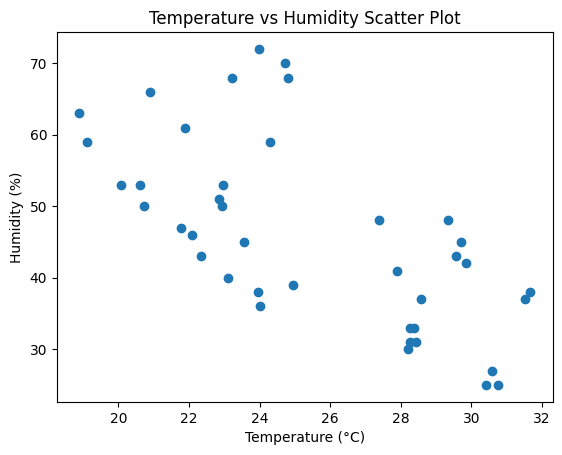

In [ ]:
# Scatter plot: Temperature vs Humidity
plt.scatter(weather_df['Temperature'], weather_df['Humidity'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs Humidity Scatter Plot')
plt.show()


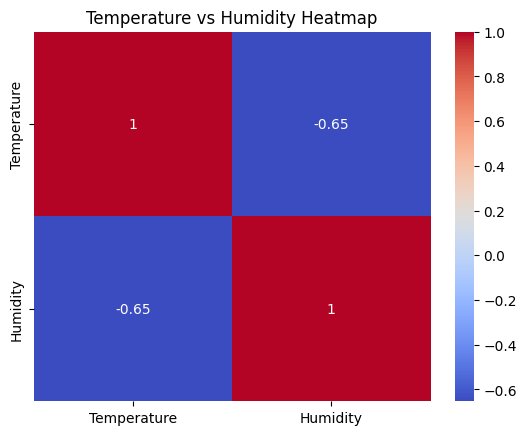

In [ ]:
# Heatmap: Temperature vs Humidity
heatmap_data = weather_df[['Temperature', 'Humidity']].corr()
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Temperature vs Humidity Heatmap')
plt.show()


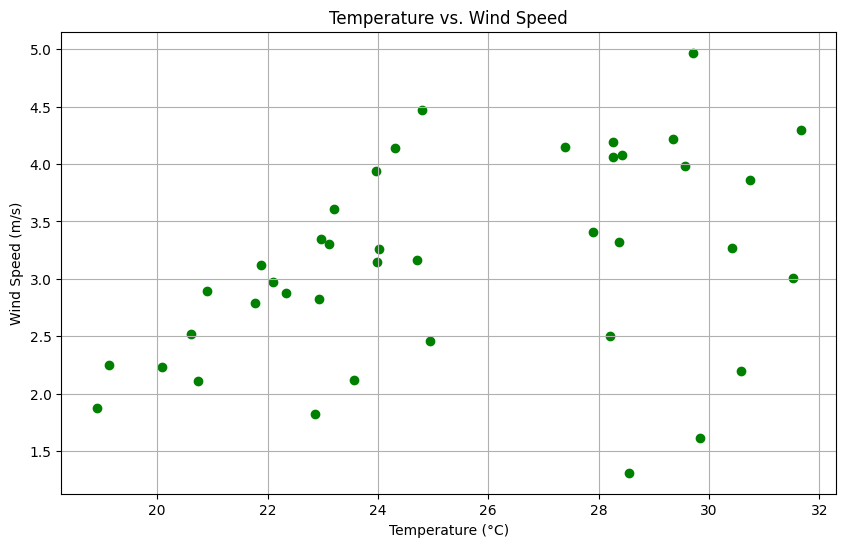

In [ ]:
# Scatter plot: Temperature vs Wind Speed
plt.figure(figsize=(10, 6))
plt.scatter(weather_df['Temperature'], weather_df['Wind Speed'], color='green')
plt.title('Temperature vs. Wind Speed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()


##DMV - 3 : Customer Churn

Steps :
1. import libraries
2. load dataset
3. explore dataframe
4. convert 'totalcharges' to numeric and handle missing values(fillna(median())
5. drop nan values - dropna
6. drop duplicates
7. check unique values in categorical column - payment method
8. perform feature engg and create tenuregroup feature using pd.cut() and display tenure, totalcharges, tenuregroup
9. visualizations :

    a. boxplot(tenuregroup,monthlycharges)

    b. countplot (payment methods)

    c. pairplot(data)

    d. countplot(tenuregroup)

    e. boxplot(monthlycharges)

10. Initialize MinMaxScaler and standard scaler, apply on monthlycharges and tenure respectively.
11. select x=df.drop(['Churn'],axis=1) , y=df['churn'] and apply train_test_split
12. check shape of test and train samples
13. save the cleaned dataframe in csv - using to_csv function

In [ ]:
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
df=pd.read_csv('/content/telecom_customer_churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
df['TotalCharges'].fillna(df['TotalCharges'].median,inplace=True)

<ipython-input-76-b9baee0d4ce3>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<bound method Series.median of 0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['TotalCharges'].fillna(df['TotalCharges'].median,inplace=True)


In [ ]:
df['TotalCharges'].isnull().sum()

0

In [ ]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [ ]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [ ]:
bins=[0,12,24,36,48,60,np.inf]
labels=['0-12','12-24','24-36','36-48','48-60','60+']
df['tenuregroup']=pd.cut(df['tenure'],bins=bins,labels=labels,right=False)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenuregroup
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,24-36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,36-48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12


In [ ]:
mm=MinMaxScaler()

In [ ]:
s=StandardScaler()

In [ ]:
df[['MonthlyCharges']]=mm.fit_transform(df[['MonthlyCharges']])
df[['tenure']]=s.fit_transform(df[['tenure']])

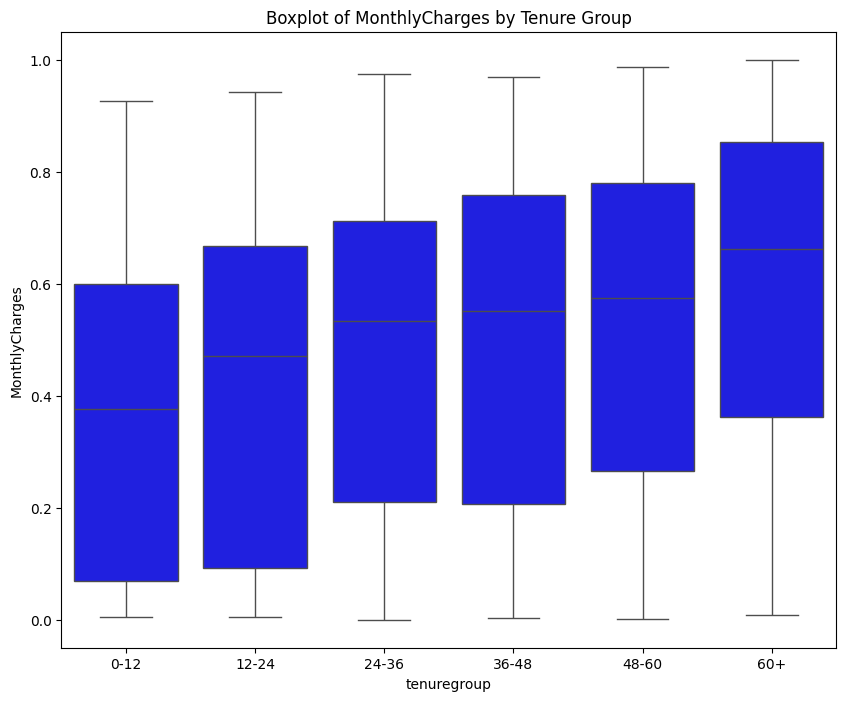

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='tenuregroup', y='MonthlyCharges', data=df, color='blue')
plt.title("Boxplot of MonthlyCharges by Tenure Group")
plt.show()

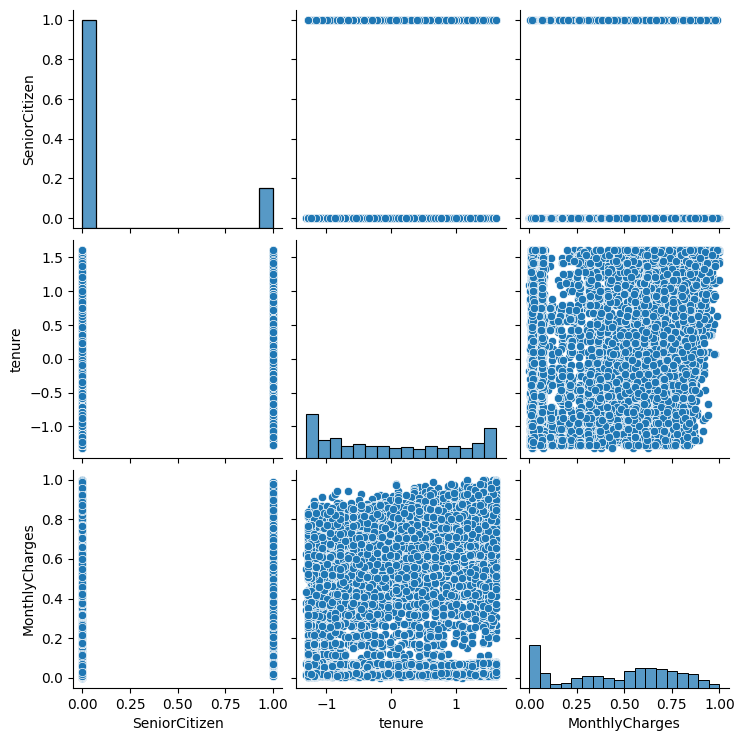

In [ ]:
# Visualizations for exploratory data analysis
sns.pairplot(df)
plt.show()

<ipython-input-92-a972dee92676>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PaymentMethod', data=df, palette='viridis')


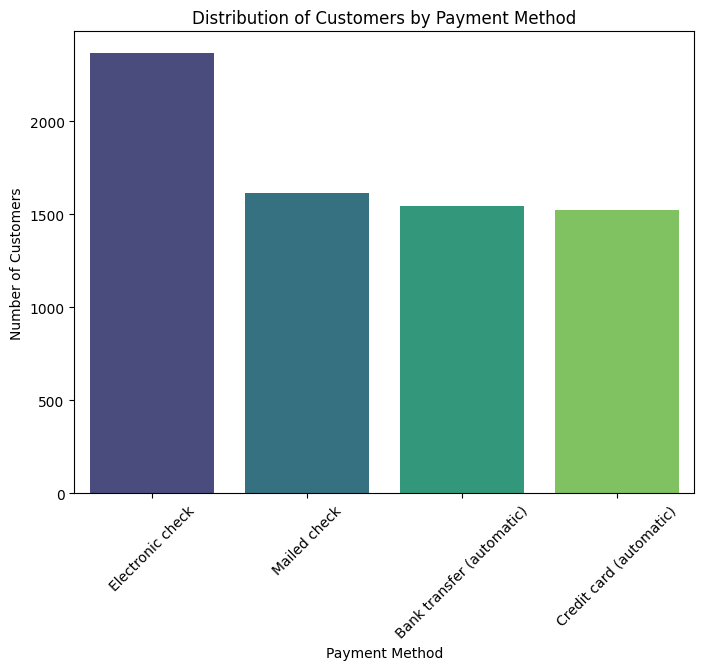

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='PaymentMethod', data=df, palette='viridis')
plt.title('Distribution of Customers by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

<ipython-input-93-1a822caf7845>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['tenuregroup'], palette='viridis')


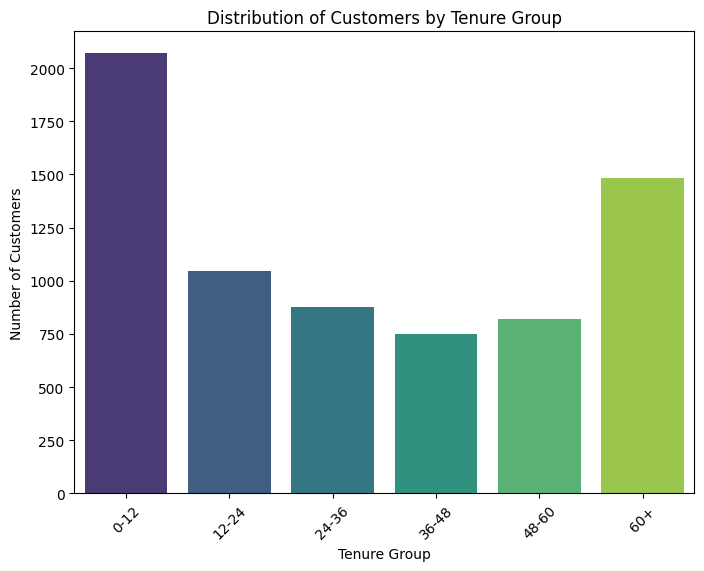

In [ ]:
# Count plot to see the distribution of customers across different TenureGroups
plt.figure(figsize=(8, 6))
sns.countplot(x=df['tenuregroup'], palette='viridis')
plt.title('Distribution of Customers by Tenure Group')
plt.xlabel('Tenure Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

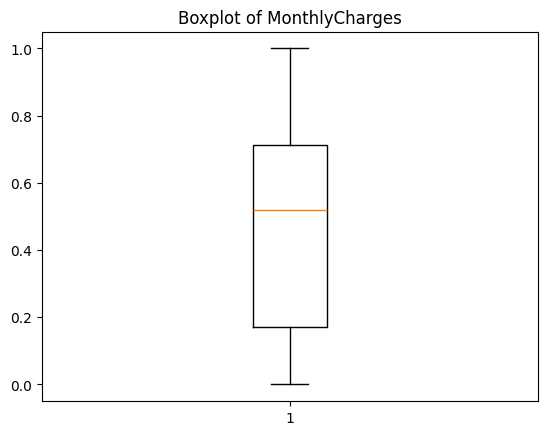

In [ ]:
# Additional boxplot for MonthlyCharges
plt.boxplot(df['MonthlyCharges'])
plt.title("Boxplot of MonthlyCharges")
plt.show()

In [ ]:
X = df.drop("Churn", axis=1)
y = df["Churn"]
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Training Set Shape:", X_train.shape, y_train.shape)
print("Test Set Shape:", X_test.shape, y_test.shape)

Training Set Shape: (5634, 21) (5634,)
Test Set Shape: (1409, 21) (1409,)


In [ ]:
df.to_csv("Cleaned_telecom_customer_churn.csv", index=False)

##DMV - 4 : RealEstate

In [ ]:
import re

In [ ]:
#pandas, plt, np

In [ ]:
df=pd.read_csv('Bengaluru_House_Data.csv')

In [ ]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [ ]:
df.shape

(13320, 9)

In [ ]:
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [ ]:
df.dtypes

,0
area_type,object
availability,object
location,object
size,object
society,object
total_sqft,object
bath,float64
balcony,float64
price,float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
df['size']=df['size'].str.extract(r'(\d+)')
df['size']=pd.to_numeric(df['size'],errors='coerce')

In [ ]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,NaN,1200,2.0,1.0,51.00


In [ ]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5.0,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4.0,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2.0,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4.0,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1.0,NaN,550,1.0,1.0,17.0


In [ ]:
df[df['size']>10]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
459,Super built-up Area,Ready To Move,1 Giri Nagar,11.0,Bancyri,5000,9.0,3.0,360.0
1718,Super built-up Area,Ready To Move,2Electronic City Phase II,27.0,NaN,8000,27.0,0.0,230.0
1768,Plot Area,Ready To Move,1 Ramamurthy Nagar,11.0,NaN,1200,11.0,0.0,170.0
3379,Super built-up Area,Ready To Move,1Hanuman Nagar,19.0,NaN,2000,16.0,NaN,490.0
3609,Super built-up Area,Ready To Move,Koramangala Industrial Layout,16.0,NaN,10000,16.0,NaN,550.0
3853,Plot Area,Ready To Move,1 Annasandrapalya,11.0,NaN,1200,6.0,3.0,150.0
4684,Plot Area,Ready To Move,Munnekollal,43.0,NaN,2400,40.0,0.0,660.0
4916,Super built-up Area,Ready To Move,1Channasandra,14.0,NaN,1250,15.0,0.0,125.0
6533,Plot Area,Ready To Move,Mysore Road,12.0,NaN,2232,6.0,2.0,300.0
7979,Super built-up Area,Ready To Move,1 Immadihalli,11.0,NaN,6000,12.0,NaN,150.0


In [ ]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
def convertsqft(x):
  token=x.split('-')
  if len(token)>=2:
    try:
      return (float(token[0])+float(token[1]))/2
    except ValueError:
      return None
  try:
    return float(x)
  except ValueError:
    return None

In [ ]:
df['total_sqft']=df['total_sqft'].apply(convertsqft)

In [ ]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,NaN,1200.0,2.0,1.0,51.00


In [ ]:
df.dtypes

,0
area_type,object
availability,object
location,object
size,float64
society,object
total_sqft,float64
bath,float64
balcony,float64
price,float64


In [ ]:
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,46
bath,73
balcony,609
price,0


In [ ]:
df['total_sqft'].fillna(df['total_sqft'].median(), inplace=True)
df['location'].fillna(df['location'].mode()[0], inplace=True)
df['society'].fillna('unknown', inplace=True)
df['balcony'].fillna(0,inplace=True)
df['bath'].fillna('ffill',inplace=True)

<ipython-input-127-655f62787793>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_sqft'].fillna(df['total_sqft'].median(), inplace=True)
<ipython-input-127-655f62787793>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [ ]:
df.isnull().sum()

,0
area_type,0
availability,0
location,0
size,16
society,0
total_sqft,0
bath,0
balcony,0
price,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(13304, 9)

In [ ]:
df['rate']=(df['price']/df['total_sqft'])

In [ ]:
df['rate'].describe()

,rate
count,13304.000000
mean,0.079245
std,1.063108
min,0.002678
25%,0.042709
50%,0.054428
75%,0.073333
max,120.000000


In [ ]:
def is_costly(x):
  if x>0.079245:
    return 1
  else:
    return 0

In [ ]:
df['costly']=df['rate'].apply(is_costly)

In [ ]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,rate,costly
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,Coomee,1056.0,2.0,1.0,39.07,0.036998,0
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,Theanmp,2600.0,5.0,3.0,120.00,0.046154,0
2,Built-up Area,Ready To Move,Uttarahalli,3.0,unknown,1440.0,2.0,3.0,62.00,0.043056,0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,Soiewre,1521.0,3.0,1.0,95.00,0.062459,0
4,Super built-up Area,Ready To Move,Kothanur,2.0,unknown,1200.0,2.0,1.0,51.00,0.042500,0


In [ ]:
df_Kothanur=df[df['location']=='Kothanur']
df_Kothanur.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,rate,costly
4,Super built-up Area,Ready To Move,Kothanur,2.0,unknown,1200.0,2.0,1.0,51.0,0.042500,0
102,Plot Area,Ready To Move,Kothanur,3.0,BDensar,2400.0,2.0,1.0,150.0,0.062500,0
146,Super built-up Area,Ready To Move,Kothanur,3.0,Somumys,1828.0,3.0,0.0,110.0,0.060175,0
196,Super built-up Area,Ready To Move,Kothanur,2.0,unknown,1186.0,2.0,2.0,58.0,0.048904,0
247,Super built-up Area,Ready To Move,Kothanur,3.0,Bisic C,1577.0,3.0,1.0,70.0,0.044388,0


In [ ]:
df_Kothanur.value_counts().sum()

66

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13304 entries, 0 to 13319
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13304 non-null  object 
 1   availability  13304 non-null  object 
 2   location      13304 non-null  object 
 3   size          13304 non-null  float64
 4   society       13304 non-null  object 
 5   total_sqft    13304 non-null  float64
 6   bath          13304 non-null  object 
 7   balcony       13304 non-null  float64
 8   price         13304 non-null  float64
 9   rate          13304 non-null  float64
 10  costly        13304 non-null  int64  
dtypes: float64(5), int64(1), object(5)
memory usage: 1.2+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [ ]:
df['area_type']=le.fit_transform(df['area_type'])

In [ ]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,rate,costly
0,3,19-Dec,Electronic City Phase II,2.0,Coomee,1056.0,2.0,1.0,39.07,0.036998,0
1,2,Ready To Move,Chikka Tirupathi,4.0,Theanmp,2600.0,5.0,3.0,120.00,0.046154,0
2,0,Ready To Move,Uttarahalli,3.0,unknown,1440.0,2.0,3.0,62.00,0.043056,0
3,3,Ready To Move,Lingadheeranahalli,3.0,Soiewre,1521.0,3.0,1.0,95.00,0.062459,0
4,3,Ready To Move,Kothanur,2.0,unknown,1200.0,2.0,1.0,51.00,0.042500,0


In [ ]:
summary=df.groupby('area_type')['price'].agg(['mean','median','std','count']).reset_index()

In [ ]:
summary

,area_type,mean,median,std,count
0,0,104.285498,70.0,109.270222,2418
1,1,89.502356,70.0,73.446012,87
2,2,209.368148,140.0,253.849250,2009
3,3,92.971757,65.0,113.971214,8790


In [ ]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the upper and lower bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers by keeping only the rows within the bounds
df_cleaned = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# The df1_cleaned dataframe now has outliers removed
df_cleaned

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,rate,costly
0,3,19-Dec,Electronic City Phase II,2.0,Coomee,1056.0,2.0,1.0,39.07,0.036998,0
1,2,Ready To Move,Chikka Tirupathi,4.0,Theanmp,2600.0,5.0,3.0,120.00,0.046154,0
2,0,Ready To Move,Uttarahalli,3.0,unknown,1440.0,2.0,3.0,62.00,0.043056,0
3,3,Ready To Move,Lingadheeranahalli,3.0,Soiewre,1521.0,3.0,1.0,95.00,0.062459,0
4,3,Ready To Move,Kothanur,2.0,unknown,1200.0,2.0,1.0,51.00,0.042500,0
...,...,...,...,...,...,...,...,...,...,...,...
13312,3,Ready To Move,Bellandur,2.0,unknown,1262.0,2.0,2.0,47.00,0.037242,0
13313,3,Ready To Move,Uttarahalli,3.0,Aklia R,1345.0,2.0,1.0,57.00,0.042379,0
13314,3,Ready To Move,Green Glen Layout,3.0,SoosePr,1715.0,3.0,3.0,112.00,0.065306,0
13317,0,Ready To Move,Raja Rajeshwari Nagar,2.0,Mahla T,1141.0,2.0,1.0,60.00,0.052585,0


##DMV - 5 : Pollutant Visualizations

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
data=pd.read_csv('City_Air_Quality.csv')

In [ ]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
data.isnull().sum()

,0
City,0
Date,0
PM2.5,3887
PM10,9233
NO,2874
NO2,2832
NOx,3750
NH3,8372
CO,1683
SO2,3156


In [ ]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,20259.000000,14913.000000,21272.000000,21314.000000,20396.000000,15774.000000,22463.000000,20990.000000,20876.000000,20105.000000,18206.000000,8580.000000,20408.000000
mean,68.303614,122.561411,17.589556,29.102762,33.975086,26.591953,2.496435,14.009233,34.512251,2.963002,8.096887,2.596112,170.921011
std,64.142521,91.343183,22.666466,24.275804,32.416548,27.151310,7.669468,18.609088,20.798985,9.698108,15.144094,5.635406,147.161630
min,0.160000,0.210000,0.020000,0.010000,0.000000,0.010000,0.000000,0.210000,0.010000,0.000000,0.000000,0.000000,18.000000
25%,30.180000,59.790000,5.960000,12.560000,14.237500,10.520000,0.490000,5.690000,19.660000,0.140000,0.550000,0.100000,82.000000
50%,49.850000,99.690000,9.860000,22.160000,24.320000,19.315000,0.870000,9.070000,31.300000,1.050000,2.690000,0.750000,120.000000
75%,81.750000,155.070000,19.230000,37.770000,42.030000,33.867500,1.430000,14.280000,45.240000,2.910000,8.450000,2.600000,215.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,391.880000,411.520000,137.450000,2049.000000


In [ ]:
data.shape

(24146, 16)

In [ ]:
data.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [ ]:
data['Date']=pd.to_datetime(data['Date'], errors='coerce')

In [ ]:
data.dtypes

,0
City,object
Date,datetime64[ns]
PM2.5,float64
PM10,float64
NO,float64
NO2,float64
NOx,float64
NH3,float64
CO,float64
SO2,float64


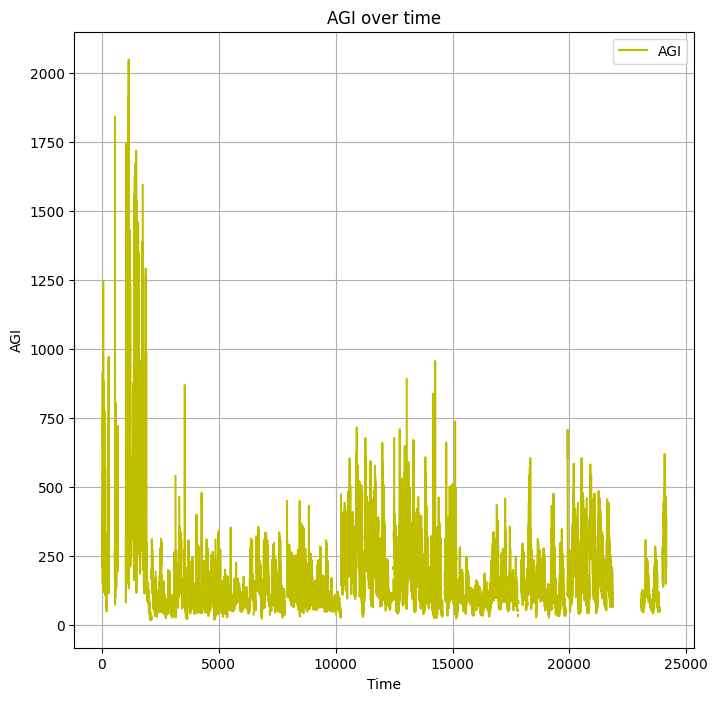

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(data.index, data['AQI'], label='AGI', color='y')
plt.title('AGI over time')
plt.xlabel("Time")
plt.ylabel("AGI")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
data.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

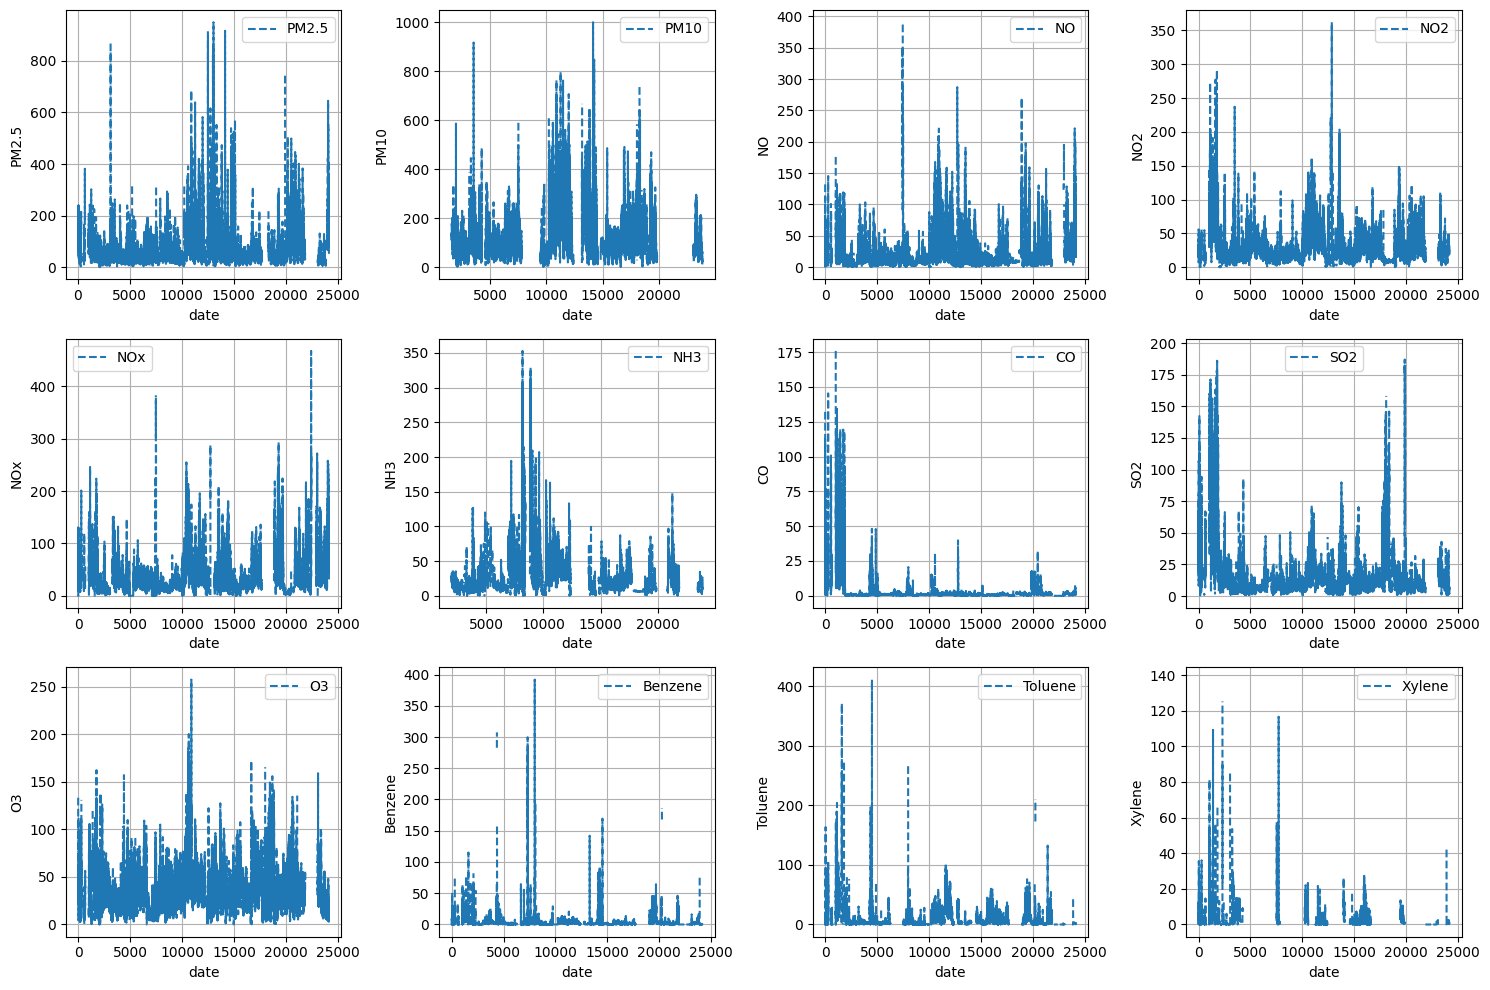

In [ ]:
pollutant=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene']
plt.figure(figsize=(15,10))
for i,pol in enumerate(pollutant,1):
  plt.subplot(3,4,i)
  plt.plot(data.index, data[pol], label=pol,linestyle='--')
  plt.xlabel("date")
  plt.ylabel(pol)
  plt.grid()
  plt.legend()
  plt.tight_layout()
plt.show()

In [ ]:
data.set_index('Date',inplace=True)

<ipython-input-176-ea524961dbef>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_grp = data[['PM2.5','PM10','NO']].resample('M').mean()


<Axes: xlabel='Date'>

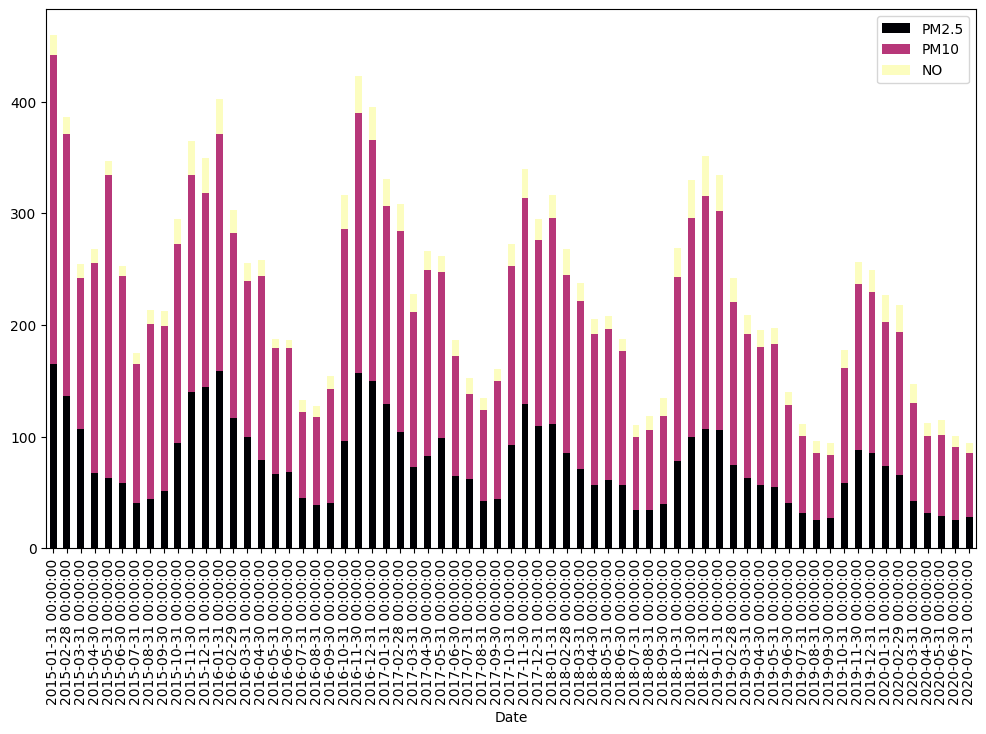

In [ ]:
df_grp = data[['PM2.5','PM10','NO']].resample('M').mean()
df_grp.plot(kind='bar',stacked=True, figsize=(12,7), colormap='magma')

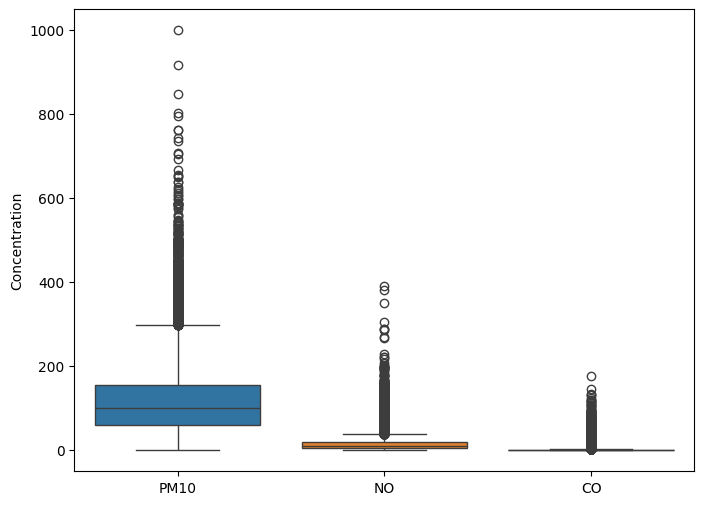

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data[['PM10','NO','CO']])
plt.ylabel('Concentration')
plt.show()

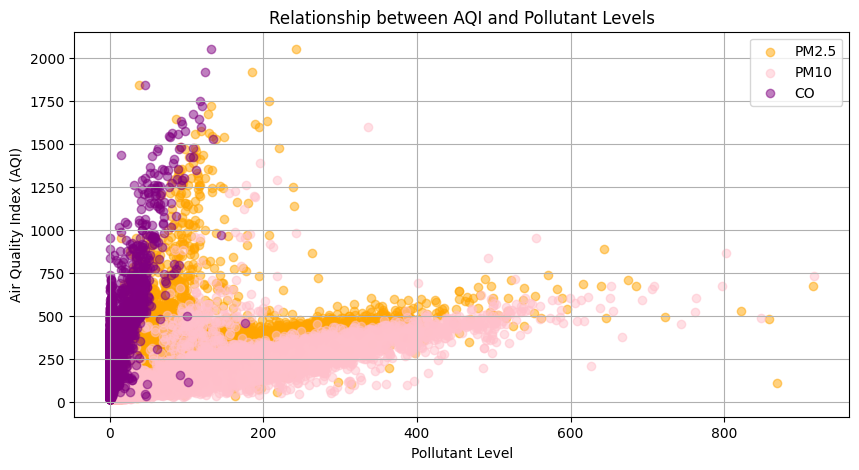

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(data['PM2.5'],data['AQI'],label='PM2.5',alpha=0.5,color='Orange')
plt.scatter(data['PM10'], data['AQI'], label='PM10',alpha=0.5,color='Pink')
plt.scatter(data['CO'],data['AQI'],label='CO',alpha=0.5, color='Purple')
plt.xlabel('Pollutant Level')
plt.ylabel('Air Quality Index (AQI)')
plt.title('Relationship between AQI and Pollutant Levels')
plt.legend()
plt.grid(True)
plt.show()

##DMV - 6 : Retail/ Customer dataset

In [ ]:
#pd, np, plt, sns

In [ ]:
df=pd.read_csv('customer_shopping_data.csv')

In [ ]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5.0,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3.0,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1.0,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5.0,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4.0,60.60,Cash,24/10/2021,Kanyon


In [ ]:
df.isnull().sum()

,0
invoice_no,0
customer_id,0
gender,0
age,0
category,0
quantity,1
price,1
payment_method,1
invoice_date,1
shopping_mall,1


In [ ]:
df.columns


Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

In [ ]:
df.dtypes

,0
invoice_no,object
customer_id,object
gender,object
age,int64
category,object
quantity,float64
price,float64
payment_method,object
invoice_date,object
shopping_mall,object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27642 entries, 0 to 27641
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      27642 non-null  object 
 1   customer_id     27642 non-null  object 
 2   gender          27642 non-null  object 
 3   age             27642 non-null  int64  
 4   category        27642 non-null  object 
 5   quantity        27641 non-null  float64
 6   price           27641 non-null  float64
 7   payment_method  27641 non-null  object 
 8   invoice_date    27641 non-null  object 
 9   shopping_mall   27641 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.1+ MB


In [ ]:
df['invoice_date']=pd.to_datetime(df['invoice_date'], dayfirst=True, errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27642 entries, 0 to 27641
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      27642 non-null  object        
 1   customer_id     27642 non-null  object        
 2   gender          27642 non-null  object        
 3   age             27642 non-null  int64         
 4   category        27642 non-null  object        
 5   quantity        27641 non-null  float64       
 6   price           27641 non-null  float64       
 7   payment_method  27641 non-null  object        
 8   invoice_date    27641 non-null  datetime64[ns]
 9   shopping_mall   27641 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 2.1+ MB


In [ ]:
df_grp=df.groupby('shopping_mall')['price'].sum().reset_index()

In [ ]:
df_grp.head()

,shopping_mall,price
0,Cevahir AVM,913555.36
1,Emaar Square Mall,927215.95
2,Forum Istanbul,895712.68
3,Istinye Park,1874608.87
4,Kanyon,3774006.38


In [ ]:
df_grp.shape

(10, 2)

<Axes: >

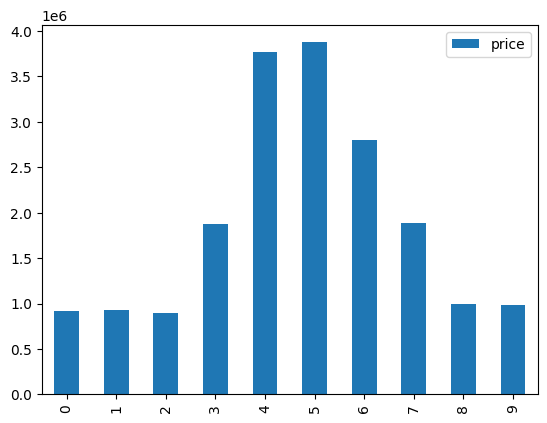

In [ ]:
df_grp.plot(kind='bar')

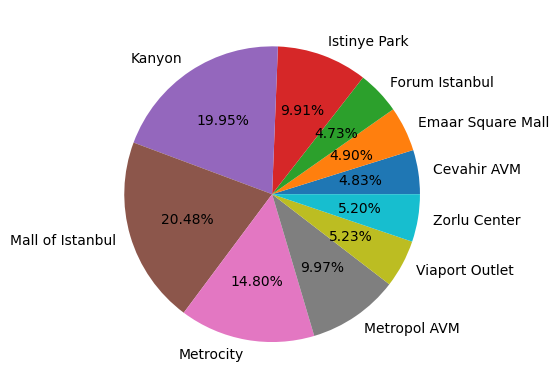

In [ ]:
plt.pie(df_grp['price'],autopct='%1.2f%%',labels=df_grp['shopping_mall'])
plt.show()

In [ ]:
top_3malls=df_grp.nlargest(3,'price')

In [ ]:
top_3malls

,shopping_mall,price
5,Mall of Istanbul,3874873.68
4,Kanyon,3774006.38
6,Metrocity,2799049.70


In [ ]:
df_grp.sort_values(by='price',ascending=False)

,shopping_mall,price
5,Mall of Istanbul,3874873.68
4,Kanyon,3774006.38
6,Metrocity,2799049.70
7,Metropol AVM,1886384.39
3,Istinye Park,1874608.87
8,Viaport Outlet,989716.52
9,Zorlu Center,983379.89
1,Emaar Square Mall,927215.95
0,Cevahir AVM,913555.36
2,Forum Istanbul,895712.68


In [ ]:
dfgrpprod=df.groupby(['category','shopping_mall'])['price'].sum()

In [ ]:
dfgrpprod=pd.DataFrame(dfgrpprod)

<Axes: xlabel='shopping_mall'>

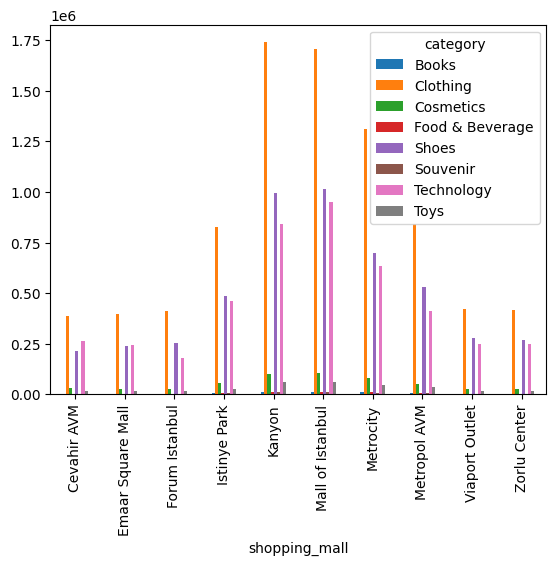

In [ ]:
pt=dfgrpprod.pivot_table(values='price',columns='category',index='shopping_mall',aggfunc='sum')
pt.plot(kind='bar')